# Deutsch-Jozsa Algorithm

In [3]:
# importing Qiskit libraries
from qiskit import *

# Importing numpy
import numpy as np

# Create Oracle for Constant Function

Output= 1


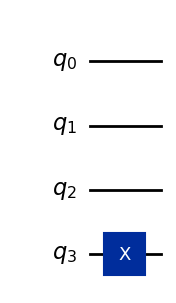

In [4]:
# Set the length of n-bit input string
n = 3

# Create Oracle for Constant function
const_oracle = QuantumCircuit(n+1)

# Choose the bits{0,1} at random, since the constant function could give either 0 or 1
output = np.random.randint(2)

print("Output=", output)

if output==1:
    const_oracle.x(n)

const_oracle.draw('mpl')

# Create Oracle for Balanced Function

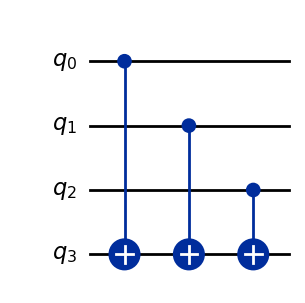

In [4]:
balanced_oracle = QuantumCircuit(n+1)

for qubit in range(n):
    balanced_oracle.cx(qubit,n)

balanced_oracle.draw('mpl')

# Create Deutsch-Jozsa Circuit

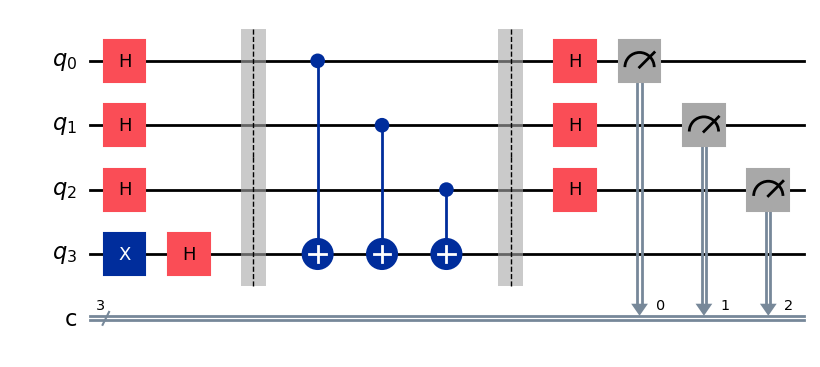

In [5]:
dj_circuit = QuantumCircuit(n+1,n)

# Apply Hadamard gate (H) to all qubits in the first register
for qubit in range(n):
    dj_circuit.h(qubit)

# Put the qubit in the second register in the |1> state
dj_circuit.x(n)

# Apply H to the qubit in the second register
dj_circuit.h(n)

# Place barrier after this
dj_circuit.barrier()

# Add quantum oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Place barrier after this
dj_circuit.barrier()

# Apply H gates to qubits in first register
for qubit in range(n):
    dj_circuit.h(qubit)

# Measure the qubits in the first register and store the measurement in their respective classical bit
for i in range(n):
    dj_circuit.measure(i,i)

# Display Circuit
dj_circuit.draw('mpl')

# Run Using Local Simulator

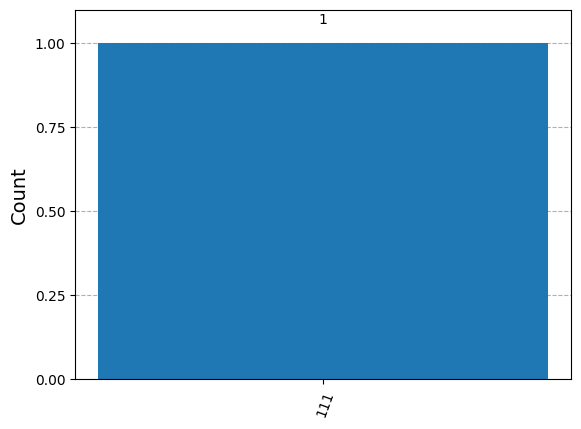

In [6]:
# Import AerSimulator from qiskit_aer
from qiskit_aer import AerSimulator

# Run the circuit on teh simulator and obtain the result
result = AerSimulator().run(dj_circuit, shots=1, memory=True).result()

# Get the counts from the results
answer = result.get_counts()

# Plot the answer i.e. counts
# f(x) constant implies P_(000...0) = 1
# f(x) balanced implies P_(000...0) = 0

# Import plot_histogram from qiskit.visualization
from qiskit.visualization import plot_histogram
plot_histogram(answer)

# Run on Real Quantum Device

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Instantiate the Qiskit IBM Runtime service - allows us access the quantum hardware
#service = QiskitRuntimeService(channel="ibm_quantum",
                                #token="fb097dad740ea2487c70ca5ab36427d0c3c9374237005f879d1546a757b68341d81daf61cf24e266ca2b1e9f3ace1aa1efa16fbbf75b78da07e77af3173e5d2f")


In [9]:
# Save your QiskitRuntimeService account to your environment to avoid putting your token everytime you want to use it.
#QiskitRuntimeService.save_account(channel="ibm_quantum",
                                    #token="fb097dad740ea2487c70ca5ab36427d0c3c9374237005f879d1546a757b68341d81daf61cf24e266ca2b1e9f3ace1aa1efa16fbbf75b78da07e77af3173e5d2f")

Least busy backend: <IBMBackend('ibm_osaka')>
>>> Job ID: ctnb8f94gjh0008pgva0
>>> Job Status: QUEUED
Name of Classical Register: c
Count: {'111': 920, '110': 48, '101': 16, '011': 30, '000': 5, '100': 4, '010': 1}


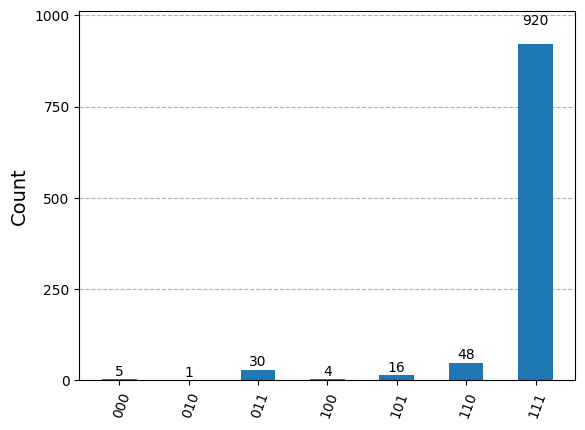

In [23]:

from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# Call the Quantum computer you want to use
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
print("Least busy backend:", backend)

# Alternative way of calling backend
#backend_name = "ibm_brisbane"
#backend = service.backend(backend_name)

# Check the number of qubits the quantum computer has
#backend.num_qubits



# Optimize and transform quantum circuits
pass_manager = generate_preset_pass_manager(optimization_level=1,backend=backend)
dj_circuit_transpiled = pass_manager.run(dj_circuit)

sampler = Sampler(mode=backend)
job = sampler.run([dj_circuit_transpiled], shots=1024)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")
result = job.result()

# get name of classical register to get the result
reg_name = dj_circuit.cregs[0].name
print("Name of Classical Register:",reg_name)

# get result
answer = result[0].data.c.get_counts()
print("Count:", answer)

# Plot graph
plot_histogram(answer)

In [ ]:
job = sampler.run(circuits)
metadata = job.metadata()
print(metadata)